In [1]:
import pandas as pd

In [2]:
import string
invalidChars = set(string.punctuation)

In [33]:
def clean_data(df):
    freq_filtered = df.loc[df['frequency'] >= 3]
    ngram_list = freq_filtered.ngram.tolist()
    freq_list = freq_filtered['raw frequency'].tolist()
    lr_list = freq_filtered['likelihood ratio'].tolist()
    pmi_list = freq_filtered['pmi'].tolist()
    raw_freq_list = freq_filtered['frequency'].tolist()
    t_list = freq_filtered['t score'].tolist()
    tag_list = freq_filtered['tag'].tolist()
    raw_freq = []
    lr = []
    ngrams = []
    pmi = []
    freq = []
    t = []
    tag = []
    for i in range(len(ngram_list)):
        if not any(char in invalidChars for char in ngram_list[i]): 
            ngrams.append(ngram_list[i])
            freq.append(freq_list[i])
            lr.append(lr_list[i])
            pmi.append(pmi_list[i])
            t.append(t_list[i])
            raw_freq.append(raw_freq_list[i])
            tag.append(tag_list[i])
    df_new=pd.DataFrame({'ngram':ngrams, 
                 'tag':tag, 
                 'frequency':freq, 
                 'raw frequency':raw_freq, 
                 'likelihood ratio':lr, 
                 'pmi':pmi, 
                 't score':t})
    return df_new

In [4]:
bi_df = pd.read_csv('bigrams_cut.csv', encoding='utf-8')

In [5]:
tri_df = pd.read_csv('trigrams_cut.csv', encoding='utf-8')

In [6]:
open_bi_df = pd.read_csv('open_bigrams.csv', encoding='utf-8')

In [7]:
open_tri_df = pd.read_csv('open_trigrams.csv', encoding='utf-8')

In [8]:
rus_bi_df = pd.read_csv('rus_bigrams.csv', encoding='utf-8')

In [9]:
rus_tri_df = pd.read_csv('rus_trigrams.csv', encoding='utf-8')

In [10]:
CORPORA = ['open', 'rus']

In [13]:
def compare_datasets(my_data, other_data):
    ngram_list = my_data.ngram.tolist()
    freq_list = my_data['raw frequency'].tolist()
    lr_list = my_data['likelihood ratio'].tolist()
    pmi_list = my_data['pmi'].tolist()
    raw_freq_list = my_data['frequency'].tolist()
    t_list = my_data['t score'].tolist()
    tag_list = my_data['tag'].tolist()
    other_ngram_list = [str(x).lower() for x in other_data.ngram.tolist()]
    other_freq_list = other_data.freq.tolist()
    ngram = []
    freq_our = []
    raw_freq = []
    freq_other = []
    pmi = []
    lr = []
    t = []
    tag = []
    for i in range(len(ngram_list)):
        if ngram_list[i] in other_ngram_list:
            other_freq_ind = other_ngram_list.index(ngram_list[i])
            ngram.append(ngram_list[i])
            freq_our.append(freq_list[i])
            lr.append(lr_list[i])
            pmi.append(pmi_list[i])
            t.append(t_list[i])
            raw_freq.append(raw_freq_list[i])
            tag.append(tag_list[i])
            freq_other.append(other_freq_list[other_freq_ind])
    df=pd.DataFrame({'ngram':ngram, 
                 'tag':tag, 
                 'frequency_ours':freq_our,
                     'frequency_other':freq_other, 
                 'raw frequency':raw_freq, 
                 'likelihood ratio':lr, 
                 'pmi':pmi, 
                 't score':t})
    return df

In [14]:
def compare_other_datasets(open_data, rus_data):
    ngram_list = open_data.ngram.tolist()
    raw_freq_list = open_data['raw frequency'].tolist()
    lr_list = open_data['likelihood ratio'].tolist()
    pmi_list = open_data['pmi'].tolist()
    our_freq_list = open_data['frequency_ours'].tolist()
    open_freq_list = open_data['frequency_other'].tolist()
    t_list = open_data['t score'].tolist()
    tag_list = open_data['tag'].tolist()
    rus_ngram_list = [str(x).lower() for x in rus_data.ngram.tolist()]
    rus_freq_list = rus_data.frequency_other.tolist()
    ngram = []
    freq_our = []
    raw_freq = []
    freq_open = []
    freq_rus = []
    pmi = []
    lr = []
    t = []
    tag = []
    for i in range(len(ngram_list)):
        if ngram_list[i] in rus_ngram_list:
            rus_freq_ind = rus_ngram_list.index(ngram_list[i])
            ngram.append(ngram_list[i])
            freq_our.append(our_freq_list[i])
            freq_open.append(open_freq_list[i])
            lr.append(lr_list[i])
            pmi.append(pmi_list[i])
            t.append(t_list[i])
            raw_freq.append(raw_freq_list[i])
            tag.append(tag_list[i])
            freq_rus.append(rus_freq_list[rus_freq_ind])
    df=pd.DataFrame({'ngram':ngram, 
                 'tag':tag, 
                 'frequency_ours':freq_our,
                     'frequency_open':freq_open, 
                     'frequency_rus':freq_rus,
                 'raw frequency':raw_freq, 
                 'likelihood ratio':lr, 
                 'pmi':pmi, 
                 't score':t})
    return df

In [146]:
our_open_bi = compare_datasets(bi_df, open_bi_df)

In [147]:
our_open_bi.to_csv('our_open_bi.csv', encoding='utf-8', index=False)

In [15]:
our_open_bi = pd.read_csv('our_open_bi.csv', encoding='utf-8')

In [71]:
print(len(our_open_bi))
print(percentage(len(our_open_bi), len(bi_df)))

21343
26.641451967245857


In [148]:
our_open_tri = compare_datasets(tri_df, open_tri_df)

In [150]:
our_open_tri.to_csv('our_open_tri.csv', encoding='utf-8', index=False)

In [16]:
our_open_tri = pd.read_csv('our_open_tri.csv', encoding='utf-8')

In [72]:
print(len(our_open_tri))
print(percentage(len(our_open_tri), len(tri_df)))

3479
11.917648670868731


In [151]:
our_rus_bi = compare_datasets(bi_df, rus_bi_df)

In [152]:
our_rus_bi.to_csv('our_rus_bi.csv', encoding='utf-8', index=False)

In [17]:
our_rus_bi = pd.read_csv('our_rus_bi.csv', encoding='utf-8')

In [73]:
print(len(our_rus_bi))
print(percentage(len(our_rus_bi), len(bi_df)))

51460
64.23507090073896


In [153]:
our_rus_tri = compare_datasets(tri_df, rus_tri_df)

In [154]:
our_rus_tri.to_csv('our_rus_tri.csv', encoding='utf-8', index=False)

In [18]:
our_rus_tri = pd.read_csv('our_rus_tri.csv', encoding='utf-8')

In [74]:
print(len(our_rus_tri))
print(percentage(len(our_rus_tri), len(tri_df)))

12438
42.6075637160866


In [155]:
bi_combined = compare_other_datasets(our_open_bi, our_rus_bi)

In [156]:
bi_combined.to_csv('bi_combined.csv', encoding='utf-8', index=False)

In [19]:
bi_combined = pd.read_csv('bi_combined.csv', encoding='utf-8')

In [76]:
print(len(bi_combined))
print(percentage(len(bi_combined), len(bi_df)))

21112
26.353105652087077


In [157]:
tri_combined = compare_other_datasets(our_open_tri, our_rus_tri)

In [158]:
tri_combined.to_csv('tri_combined.csv', encoding='utf-8', index=False)

In [20]:
tri_combined = pd.read_csv('tri_combined.csv', encoding='utf-8')

In [77]:
print(len(tri_combined))
print(percentage(len(tri_combined), len(tri_df)))

3424
11.729240887914496


In [21]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy import stats

In [22]:
def get_norm_curve(var):
    array = np.array(var)
    print(stats.normaltest(array))
    n, bins, patches = plt.hist(array, 50, normed=1)
    mu = np.mean(array)
    sigma = np.std(array)
    plt.plot(bins, mlab.normpdf(bins, mu, sigma))
    plt.show()

NormaltestResult(statistic=5332.043769882311, pvalue=0.0)


C:\Users\vasel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vasel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


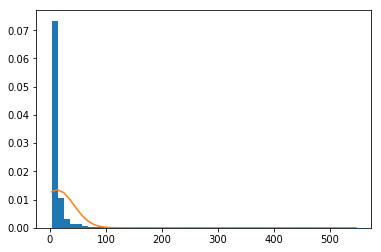

In [24]:
get_norm_curve(tri_combined.frequency_ours.tolist())

NormaltestResult(statistic=5048.907258721818, pvalue=0.0)


C:\Users\vasel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vasel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


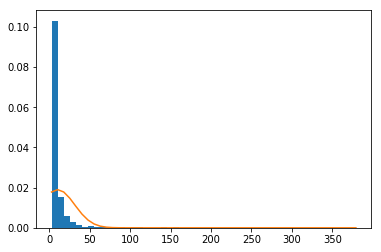

In [25]:
get_norm_curve(tri_combined.frequency_open.tolist())

NormaltestResult(statistic=4147.353268533881, pvalue=0.0)


C:\Users\vasel\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\vasel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


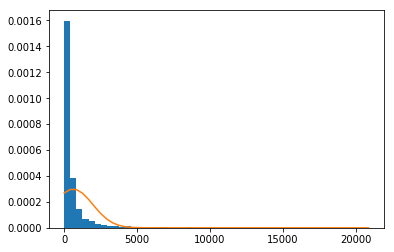

In [26]:
get_norm_curve(tri_combined.frequency_rus.tolist())

In [27]:
def get_tau(our_freq, other_freq):
    tau, p_value = stats.kendalltau(our_freq, other_freq)
    print('tau: {}'.format(tau))
    print('p value: {}'.format(p_value))
    return tau, p_value

In [166]:
open_bi_tau, open_bi_p = get_tau(our_open_bi.frequency_ours, our_open_bi.frequency_other)

tau: 0.32291303250513215
p value: 0.0


In [167]:
open_tri_tau, open_tri_p = get_tau(our_open_tri.frequency_ours, our_open_tri.frequency_other)

tau: 0.2940500445645864
p value: 3.7508370753005874e-124


In [117]:
rus_bi_tau, rus_bi_p = get_tau(our_rus_bi.frequency_ours, our_rus_bi.frequency_other)

tau: 0.2798390526482408
p value: 0.0


In [118]:
rus_tri_tau, rus_tri_p = get_tau(our_rus_tri.frequency_ours, our_rus_tri.frequency_other)

tau: 0.23222874845057462
p value: 1.7048608347281004e-279


In [168]:
combined_bi_tau, combined_bi_p = get_tau(bi_combined.frequency_ours, bi_combined.frequency_open) 

tau: 0.32305303634265103
p value: 0.0


In [169]:
combined_tri_tau, combined_tri_p = get_tau(tri_combined.frequency_ours, tri_combined.frequency_open) 

tau: 0.2992571682346022
p value: 9.361927591402609e-127


In [170]:
combined_bi_tau_r, combined_bi_p_r = get_tau(bi_combined.frequency_ours, bi_combined.frequency_rus) 

tau: 0.2468840342308918
p value: 0.0


In [171]:
combined_tri_tau_r, combined_tri_p_r = get_tau(tri_combined.frequency_ours, tri_combined.frequency_rus) 

tau: 0.20690928704538672
p value: 7.879784796388031e-68


In [172]:
combined_bi_tau_mix, combined_bi_p_mix = get_tau(bi_combined.frequency_open, bi_combined.frequency_rus) 

tau: 0.5233142958140147
p value: 0.0


In [173]:
combined_tri_tau_mix, combined_tri_p_mix = get_tau(tri_combined.frequency_open, tri_combined.frequency_rus) 

tau: 0.4334747697179039
p value: 7.077201493887625e-286


In [70]:
3.7508370753005874e-124 < 3.27207e-11

True

In [174]:
from collections import Counter
import operator

In [175]:
def get_tag_counts(tag_col):
    tags = tag_col.tolist()
    counts = Counter(tags)
    sort = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    seq = []
    freq = []
    for i in sort:
        seq.append(i[0])
        freq.append(i[1])
    df=pd.DataFrame({'tag_sequence':seq, 
                     'freq':freq})
    return df

In [176]:
bi_tag = get_tag_counts(bi_combined.tag)

In [177]:
tri_tag = get_tag_counts(tri_combined.tag)

In [178]:
bi_tag.to_csv('bi_tag.csv', encoding='utf-8', index=False)

In [179]:
tri_tag.to_csv('tri_tag.csv', encoding='utf-8', index=False)

In [65]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [28]:
ling_bi = pd.read_excel('linguistics_collocation_counts.xlsx', encoding='utf-8', sheet_name='bigrams')

In [34]:
ling_bi = clean_data(ling_bi)

In [36]:
ling_tri = pd.read_excel('linguistics_collocation_counts.xlsx', encoding='utf-8', sheet_name='trigrams')

In [37]:
ling_tri = clean_data(ling_tri)

In [39]:
eco_bi = pd.read_excel('economics_collocation_counts.xlsx', encoding='utf-8', sheet_name='bigrams')

In [40]:
eco_bi = clean_data(eco_bi)

In [41]:
eco_tri = pd.read_excel('economics_collocation_counts.xlsx', encoding='utf-8', sheet_name='trigrams')

In [42]:
eco_tri = clean_data(eco_tri)

In [43]:
h_bi = pd.read_excel('history_collocation_counts.xlsx', encoding='utf-8', sheet_name='bigrams')

In [44]:
h_bi = clean_data(h_bi)

In [45]:
h_tri = pd.read_excel('history_collocation_counts.xlsx', encoding='utf-8', sheet_name='trigrams')

In [46]:
h_tri = clean_data(h_tri)

In [47]:
l_bi = pd.read_excel('law_collocation_counts.xlsx', encoding='utf-8', sheet_name='bigrams')

In [48]:
l_bi = clean_data(l_bi)

In [49]:
l_tri = pd.read_excel('law_collocation_counts.xlsx', encoding='utf-8', sheet_name='trigrams')

In [50]:
l_tri = clean_data(l_tri)

In [51]:
pol_bi = pd.read_excel('politology_collocation_counts.xlsx', encoding='utf-8', sheet_name='bigrams')

In [52]:
pol_bi = clean_data(pol_bi)

In [53]:
pol_tri = pd.read_excel('politology_collocation_counts.xlsx', encoding='utf-8', sheet_name='trigrams')

In [54]:
pol_tri = clean_data(pol_tri)

In [55]:
s_bi = pd.read_excel('sociology_collocation_counts.xlsx', encoding='utf-8', sheet_name='bigrams')

In [56]:
s_bi = clean_data(s_bi)

In [57]:
s_tri = pd.read_excel('sociology_collocation_counts.xlsx', encoding='utf-8', sheet_name='trigrams')

In [58]:
s_tri = clean_data(s_tri)

In [59]:
psy_bi = pd.read_excel('psychology_and_pedagogics_collocation_counts.xlsx', encoding='utf-8', sheet_name='bigrams')

In [60]:
psy_bi = clean_data(psy_bi)

In [61]:
psy_tri = pd.read_excel('psychology_and_pedagogics_collocation_counts.xlsx', encoding='utf-8', sheet_name='trigrams')

In [62]:
psy_tri = clean_data(psy_tri)

In [63]:
d = {'ling2':ling_bi,
    'ling3': ling_tri,
    'eco2':eco_bi,
    'eco3':eco_tri,
    'h2':h_bi,
    'h3': h_tri,
    'l2': l_bi,
    'l3': l_tri,
    'pol2':pol_bi,
    'pol3':pol_tri,
    's2':s_bi,
    's3':s_tri,
    'psy2':psy_bi,
    'psy3':psy_tri}

In [94]:
for k, v in d.items():
    print(k)
    print(max(v.pmi))
    print(np.mean(v.pmi))

ling2
16.8549414120059
7.082589927457571
ling3
16.8549414120059
10.698685731813935
eco2
17.222285493303
6.374438844723234
eco3
17.222285493303
9.610877233528262
h2
15.0492813408563
7.034398827436415
h3
15.0492813408563
10.227604971378184
l2
16.9759375068767
6.619666292790307
l3
16.9759375068767
9.980430206142836
pol2
16.8489529661117
6.116214009818162
pol3
16.8489529661117
9.464365003988684
s2
16.8972743076829
6.541360832685625
s3
16.8972743076829
10.282814822845573
psy2
17.200802840985
6.141899764638866
psy3
17.200802840985
9.78318952387571


In [67]:
for k, v in d.items():
    if k[-1] == '2':
        print('{0}, {1}'.format(k, len(v)))
        df_o = compare_datasets(v, open_bi_df)
        print('{0} open percentage: {1}'.format(k, percentage(len(df_o), len(v))))
        df_r = compare_datasets(v, rus_bi_df)
        print('{0} rus percentage: {1}'.format(k, percentage(len(df_r), len(v))))
        df_o.to_csv('{}_open.csv'.format(k), encoding='utf-8', index=False)
        df_r.to_csv('{}_rus.csv'.format(k), encoding='utf-8', index=False)
    elif k[-1] == '3':
        print('{0}, {1}'.format(k, len(v)))
        df_o = compare_datasets(v, open_tri_df)
        print('{0} open percentage: {1}'.format(k, percentage(len(df_o), len(v))))
        df_r = compare_datasets(v, rus_tri_df)
        print('{0} rus percentage: {1}'.format(k, percentage(len(df_r), len(v))))
        df_o.to_csv('{}_open.csv'.format(k), encoding='utf-8', index=False)
        df_r.to_csv('{}_rus.csv'.format(k), encoding='utf-8', index=False)

ling2, 9548
ling2 open percentage: 40.14453288646837
ling2 rus percentage: 62.59949727691663
ling3, 3117
ling3 open percentage: 15.174847609881295
ling3 rus percentage: 33.55790824510748
eco2, 19640
eco2 open percentage: 30.519348268839103
eco2 rus percentage: 57.44908350305499
eco3, 7736
eco3 open percentage: 10.392967942088935
eco3 rus percentage: 29.20113753877973
h2, 1571
h2 open percentage: 61.362189688096755
h2 rus percentage: 83.89560789306175
h3, 372
h3 open percentage: 25.0
h3 rus percentage: 47.043010752688176
l2, 13240
l2 open percentage: 45.97432024169184
l2 rus percentage: 73.30815709969788
l3, 5306
l3 open percentage: 19.016208066339992
l3 rus percentage: 42.76290991330569
pol2, 10216
pol2 open percentage: 56.37235708692248
pol2 rus percentage: 82.98747063429914
pol3, 2791
pol3 open percentage: 29.810103905410248
pol3 rus percentage: 56.968828376925835
s2, 8192
s2 open percentage: 57.0068359375
s2 rus percentage: 81.689453125
s3, 1746
s3 open percentage: 30.58419243986254